In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [121]:
df_train = pd.read_csv("Data/train.csv")

In [122]:
df_test = pd.read_csv("Data/test.csv")

## EDA
Exploring the dataset by checking for the dataset's info, missing values and relationships to guide cleaning, preprocessing and feature engineering

In [123]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [126]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [127]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
df_train['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
E101           3
              ..
D15            1
A19            1
A6             1
C70            1
D56            1
Name: Cabin, Length: 147, dtype: int64

In [129]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [130]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Text(0.5, 1.0, 'Survival Rate By Gender')

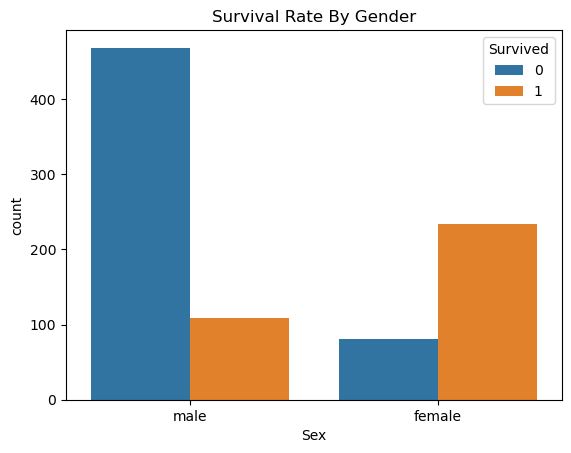

In [131]:
sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.title("Survival Rate By Gender")

Females have higher survival rate

Text(0.5, 1.0, 'Survival Rate By Pclass')

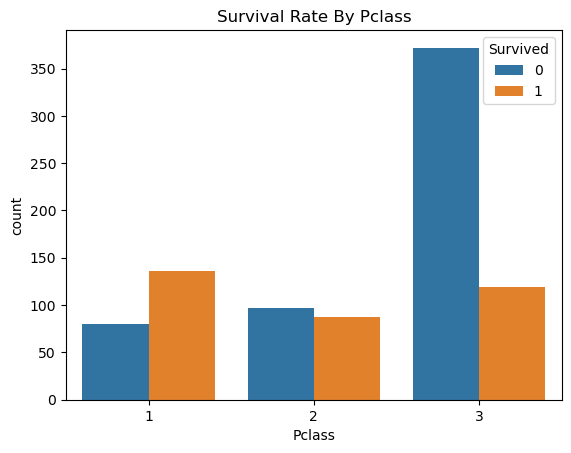

In [132]:
sns.countplot(x='Pclass', hue='Survived',data=df_train)
plt.title("Survival Rate By Pclass")

Text(0.5, 1.0, 'Survival Rate By Embarked')

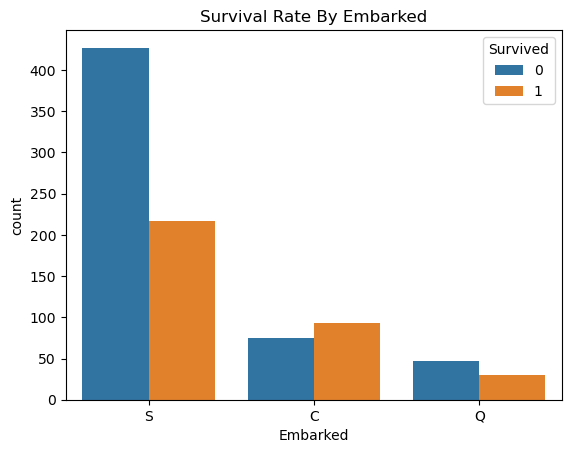

In [133]:
sns.countplot(x='Embarked', hue='Survived',data=df_train)
plt.title("Survival Rate By Embarked")

### Feature Engineering

Cleaning the dataset and handling missing values before modelling

Training set

In [134]:
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [135]:
df_train['Title'] = df_train['Title'].replace(['Mlle','Ms'], 'Miss').replace('Mme','Mrs')
df_train['Title'] = df_train['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major',
                                   'Rev','Sir','Jonkheer','Dona'],'Rare')

In [136]:
df_train.set_index('Title')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Title,,,,,,,,,,,,
Mr,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
Mrs,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
Miss,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
Mrs,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
Mr,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
Rare,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
Miss,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
Miss,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


With this Mr, Mrs,etc. goes to male and females which makes filling the missing ages more accurate and context aware

In [137]:
df_train['Age'] = df_train.groupby('Title')['Age'].apply(lambda x: x.fillna(x.median()))

In [138]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [139]:
# Checking for duplicates
df_train.duplicated().sum()

0

In [140]:
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [141]:
df_train = df_train.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Title'], axis=1)

In [142]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Test set

In [143]:
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Title'].replace(['Mlle','Ms'], 'Miss').replace('Mme','Mrs')
df_test['Title'] = df_test['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major',
                                   'Rev','Sir','Jonkheer','Dona'],'Rare')
df_test['Age'] = df_test.groupby('Title')['Age'].apply(lambda x: x.fillna(x.median()))

In [144]:
df_test['Fare'] = df_train['Fare'].fillna(df_test['Fare'].mean())

In [145]:
df_test = df_test.drop(['Name', 'Ticket', 'Cabin', 'Title'], axis=1)

In [146]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [147]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

In [148]:
X = df_train.drop('Survived', axis=1)

In [149]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,21.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [150]:
y = df_train['Survived']

### Modelling

In [151]:
from sklearn.model_selection import train_test_split, cross_val_score

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

using logistic regression

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
log_model = LogisticRegression(max_iter=1000)

In [155]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [156]:
log_preds = log_model.predict(X_test)

In [157]:
from sklearn.metrics import plot_confusion_matrix, classification_report

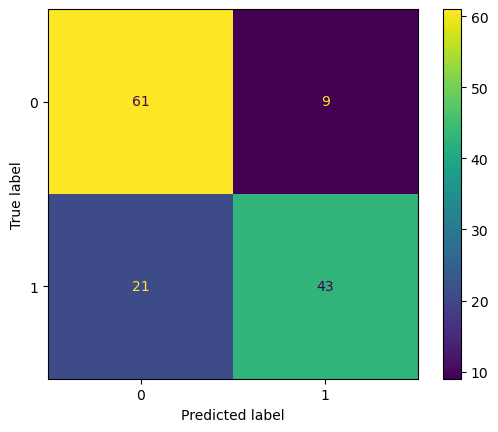

In [158]:
plot_confusion_matrix(log_model, X_test, y_test)

In [159]:
print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        70
           1       0.83      0.67      0.74        64

    accuracy                           0.78       134
   macro avg       0.79      0.77      0.77       134
weighted avg       0.78      0.78      0.77       134



using random forest classifier

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rfc = RandomForestClassifier(random_state=42)

In [162]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [163]:
rfc_preds = rfc.predict(X_test)

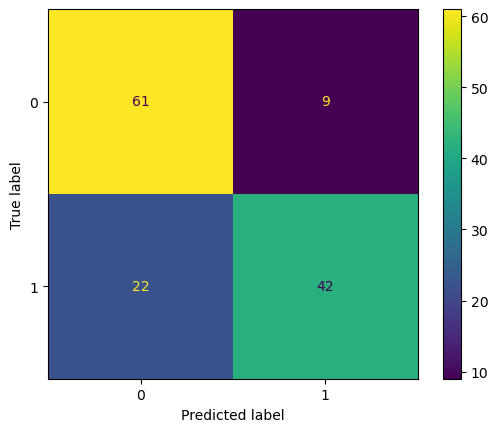

In [164]:
plot_confusion_matrix(rfc, X_test, y_test)

In [165]:
print(classification_report(y_test, rfc_preds))

              precision    recall  f1-score   support

           0       0.73      0.87      0.80        70
           1       0.82      0.66      0.73        64

    accuracy                           0.77       134
   macro avg       0.78      0.76      0.76       134
weighted avg       0.78      0.77      0.77       134



using Gradient Boosting Classifier

In [166]:
from sklearn.ensemble import GradientBoostingClassifier

In [167]:
gbc = GradientBoostingClassifier(random_state=42)

In [168]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [169]:
gbc_preds = gbc.predict(X_test)

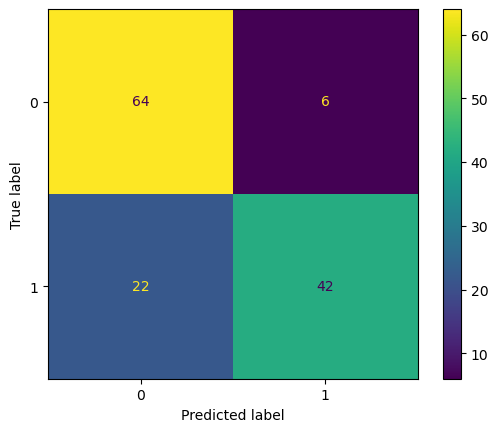

In [170]:
plot_confusion_matrix(gbc,X_test, y_test)

In [171]:
print(classification_report(y_test, gbc_preds))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        70
           1       0.88      0.66      0.75        64

    accuracy                           0.79       134
   macro avg       0.81      0.79      0.79       134
weighted avg       0.81      0.79      0.79       134



using Adaptive Boosting

In [172]:
from sklearn.ensemble import AdaBoostClassifier

In [173]:
abc = AdaBoostClassifier(random_state=42)

In [174]:
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [175]:
abc_preds = abc.predict(X_test)

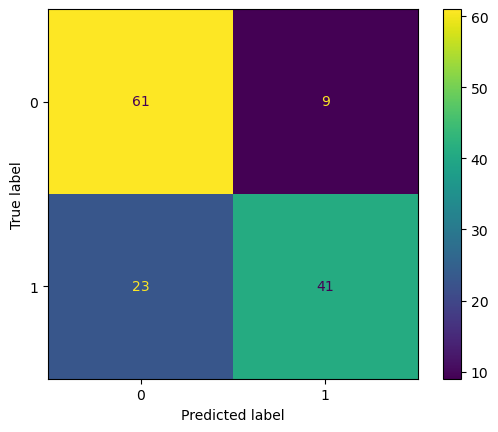

In [176]:
plot_confusion_matrix(abc, X_test, y_test)

In [177]:
print(classification_report(y_test, abc_preds))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79        70
           1       0.82      0.64      0.72        64

    accuracy                           0.76       134
   macro avg       0.77      0.76      0.76       134
weighted avg       0.77      0.76      0.76       134



In [178]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Adaptive Boosting": AdaBoostClassifier(random_state=42)
}

# Compare models with cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    print(f"{name}: {scores}")
    print(f"{name}: {scores.mean():.4f}")
    print("\n")

Logistic Regression: [0.77653631 0.78651685 0.79213483 0.78089888 0.8258427 ]
Logistic Regression: 0.7924


Random Forest: [0.79888268 0.81460674 0.8258427  0.76404494 0.83707865]
Random Forest: 0.8081


Gradient Boosting: [0.81564246 0.8258427  0.83707865 0.80898876 0.85393258]
Gradient Boosting: 0.8283


Adaptive Boosting: [0.74860335 0.80337079 0.80898876 0.83146067 0.84269663]
Adaptive Boosting: 0.8070




gradient boosting performed better than the rest

In [179]:
X_test = df_test.drop(['PassengerId'], axis=1)
passenger_ids = df_test['PassengerId']

preds = gbc.predict(X_test)

# Submission
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': preds
})
submission.to_csv('submission.csv', index=False)
